In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
from sklearn.datasets import load_boston
boston_data=load_boston()
df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
X=df['LSTAT'].values
Y=boston_data.target

In [8]:
svr=SVR(gamma='auto')
svr.fit(X.reshape(-1,1),Y)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
sort_idx=X.flatten().argsort()
pred=svr.predict(X[sort_idx].reshape(-1,1))

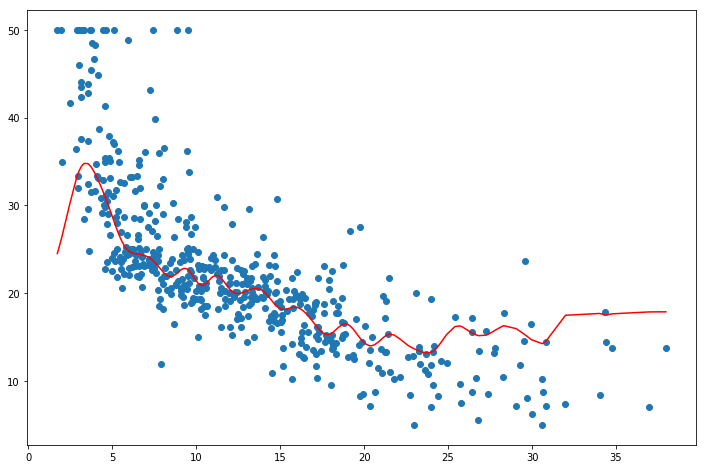

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(X[sort_idx],Y[sort_idx])
plt.plot(X[sort_idx],pred,color='red')

# linear SVR

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=0)

In [17]:
svr=SVR(kernel='linear')
svr.fit(X_train.reshape(-1,1),Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
Y_train_pred=svr.predict(X_train.reshape(-1,1))
Y_test_pred=svr.predict(X_test.reshape(-1,1))

In [23]:
print("MSE train:{0:.4f},MSE test:{1:.4f}".\
      format(mean_squared_error(Y_train,Y_train_pred),mean_squared_error(Y_test,Y_test_pred)))

MSE train:39.7023,MSE test:47.0531


In [24]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(Y_train, Y_train_pred),
             r2_score(Y_test, Y_test_pred)))

R^2 train: 0.5337, test: 0.4222


# polynomial and rbf

In [27]:
svr = SVR(kernel='poly', C=1e3, degree=2, gamma='auto')
svr.fit(X_train.reshape(-1,1), Y_train)
y_train_pred = svr.predict(X_train.reshape(-1,1))
y_test_pred = svr.predict(X_test.reshape(-1,1))
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(Y_train, y_train_pred), 
             mean_squared_error(Y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(Y_train, y_train_pred),
             r2_score(Y_test, y_test_pred)))

MSE train: 61.1188, test: 71.1109
R^2 train: 0.2822, test: 0.1267


In [29]:
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train.reshape(-1,1), Y_train)
y_train_pred = svr.predict(X_train.reshape(-1,1))
y_test_pred = svr.predict(X_test.reshape(-1,1))
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(Y_train, y_train_pred), 
             mean_squared_error(Y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(Y_train, y_train_pred),
             r2_score(Y_test, y_test_pred)))

MSE train: 25.0141, test: 33.9219
R^2 train: 0.7062, test: 0.5834
